In [9]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [4]:
datafile = pd.read_csv('/content/drive/MyDrive/DSp02/heart_disease_uci.csv')

In [3]:
# Sample Data
print(f"Here is the data sheet :")
datafile.head()

Here is the data sheet :


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
#Number of Rows & Columns
print(f"This data sheet contains {datafile.shape[0]} rows and {datafile.shape[1]}" )

This data sheet contains 920 rows and 16


In [8]:
#Checking any missing values
datafile.isnull().sum().sort_values(ascending=False)


,0
ca,611
thal,486
slope,309
fbs,90
oldpeak,62
trestbps,59
thalch,55
exang,55
chol,30
restecg,2


In [11]:
#Checking for heart disease
target = datafile['num'].value_counts()
print(target)

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


<ipython-input-13-e492bcb8606f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target.index, y=target.values, palette='viridis')


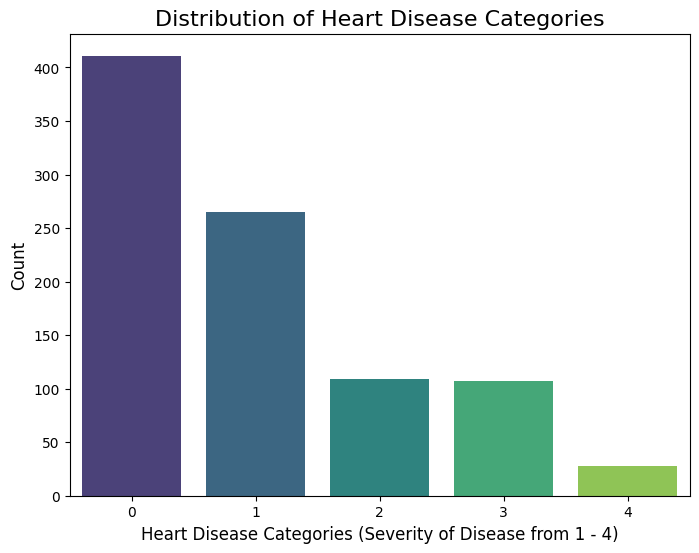

In [13]:
# chart of disease severity

plt.figure(figsize=(8, 6))
sns.barplot(x=target.index, y=target.values, palette='viridis')

# Adding labels and title
plt.title('Distribution of Heart Disease Categories', fontsize=16)
plt.xlabel('Heart Disease Categories (Severity of Disease from 1 - 4)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [15]:
#Checking for number of heart patients

no_heart_disease = target[0]
heart_disease = target[1:].sum()

print(f"Number of patients without heart disease: {no_heart_disease} \nNumber of patients with heart disease: {heart_disease}")


Number of patients without heart disease: 411 
Number of patients with heart disease: 509


In [17]:
#Calculating total percentage for effected ratio
# Total number of patients
total_patients = target.sum()

# Calculate the percentage of patients in each class
class_percentages = (target / total_patients) * 100

# Display the percentages for each class
for cls, percentage in class_percentages.items():
    print(f"Class {cls}: {percentage:.2f}%")


Class 0: 44.67%
Class 1: 28.80%
Class 2: 11.85%
Class 3: 11.63%
Class 4: 3.04%


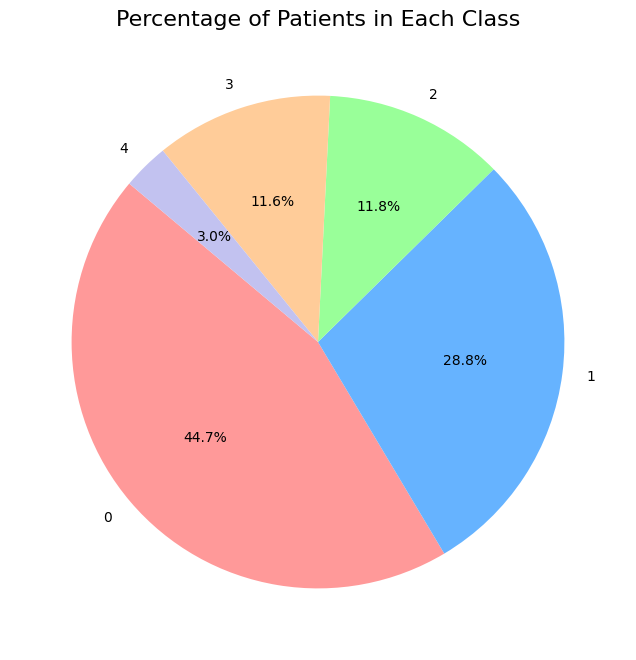

In [19]:
#Visualizing for clear ratio


# Define distinct colors for the pie chart
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Pie chart for class percentages
plt.figure(figsize=(8, 8))
plt.pie(class_percentages, labels=class_percentages.index, autopct='%1.1f%%', startangle=140, colors=colors)

# Adding title
plt.title('Percentage of Patients in Each Class', fontsize=16)
plt.show()


In [21]:
#Patients age range
range = datafile['age'].max() - datafile['age'].min()
print(f"Minimum Age :  {datafile['age'].min()} \nMaximum Age : {datafile['age'].max()} \nAge Range : {range} ")

Minimum Age :  28 
Maximum Age : 77 
Age Range : 49 


In [22]:
#Gender check
datafile['sex'].value_counts()

,count
sex,
Male,726
Female,194


In [10]:
# Average & Median of BP, Cholestrol & Heart rate

print(f"Average Resting blood pressure : {datafile['trestbps'].mean()}  \nMedian Resting blood pressure : {datafile['trestbps'].median()}")
print(f"Average Serum cholesterol  : {datafile['chol'].mean()}  \nMedian Serum cholesterol  : {datafile['chol'].median()}")
print(f"Average Maximum heart rate   : {datafile['thalch'].mean()}  \nMedian Maximum heart rate   : {datafile['thalch'].median()}")

Average Resting blood pressure : 132.13240418118468  
Median Resting blood pressure : 130.0
Average Serum cholesterol  : 199.13033707865168  
Median Serum cholesterol  : 223.0
Average Maximum heart rate   : 137.5456647398844  
Median Maximum heart rate   : 140.0


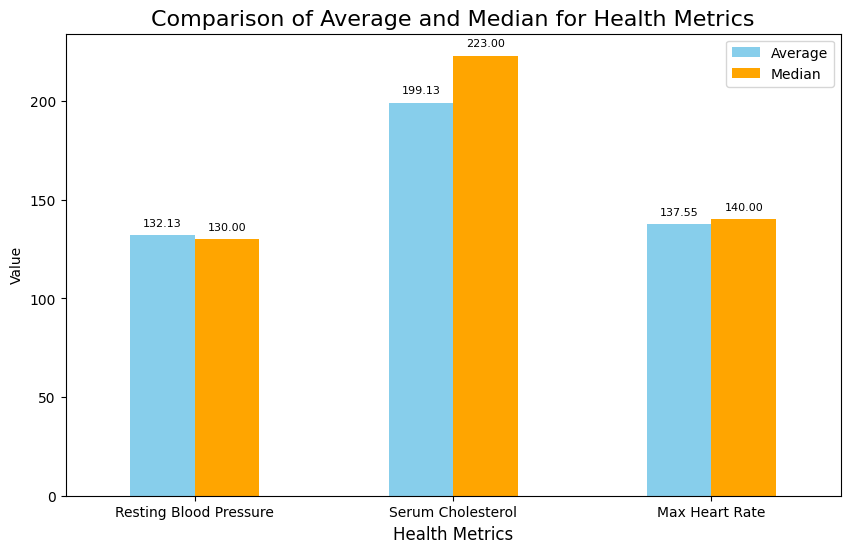

In [29]:
# Calculate average and median values
avg_trestbps = datafile['trestbps'].mean()
median_trestbps = datafile['trestbps'].median()

avg_chol = datafile['chol'].mean()
median_chol = datafile['chol'].median()

avg_thalach = datafile['thalch'].mean()
median_thalach = datafile['thalch'].median()

# Data to plot
metrics = ['Resting Blood Pressure', 'Serum Cholesterol', 'Max Heart Rate']
avg_values = [avg_trestbps, avg_chol, avg_thalach]
median_values = [median_trestbps, median_chol, median_thalach]

# Create a DataFrame for easy plotting
df = pd.DataFrame({
    'Metric': metrics,
    'Average': avg_values,
    'Median': median_values
})

# Plotting the comparison of Average and Median for each metric
ax = df.set_index('Metric').plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])

# Add values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', fontsize=8)

# Adding title and labels
plt.title('Comparison of Average and Median for Health Metrics', fontsize=16)
plt.ylabel('Value', fontsize=10)
plt.xlabel('Health Metrics', fontsize=12)
plt.xticks(rotation=0)

# Display the plot
plt.show()


In [11]:
#Patients that have excercise induced angina

datafile['exang'].value_counts()

,count
exang,
False,528
True,337


In [12]:
#Count of chest pains
datafile['cp'].value_counts()

,count
cp,
asymptomatic,496
non-anginal,204
atypical angina,174
typical angina,46


<ipython-input-31-bed8d6aceab8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cp_counts.index, y=cp_counts.values, palette='Pastel1')


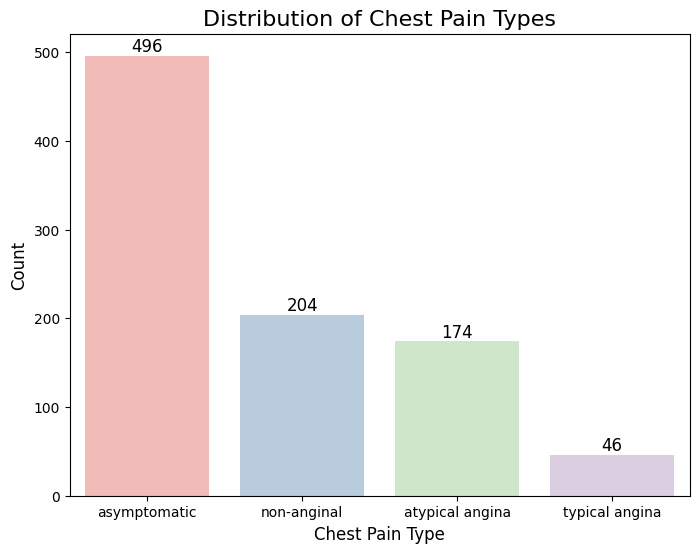

In [31]:
#Chart for number of chest pains

# Calculate the value counts for chest pain types (cp)
cp_counts = datafile['cp'].value_counts()

# Plotting the chest pain type counts
plt.figure(figsize=(8, 6))
sns.barplot(x=cp_counts.index, y=cp_counts.values, palette='Pastel1')

# Adding title and labels
plt.title('Distribution of Chest Pain Types', fontsize=16)
plt.xlabel('Chest Pain Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Displaying the count values on top of the bars
for index, value in enumerate(cp_counts.values):
    plt.text(index, value + 5, str(value), ha='center', fontsize=12)

# Display the plot
plt.show()


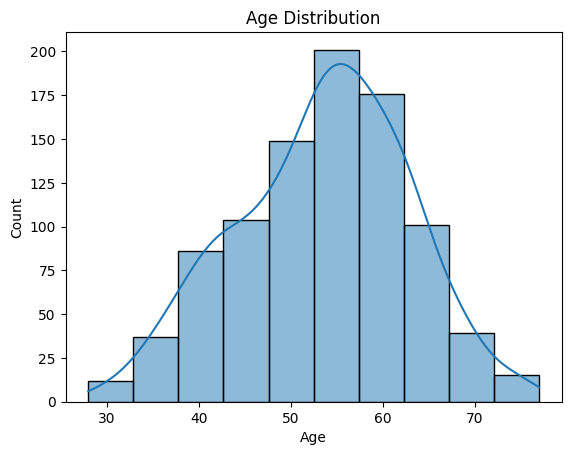

In [13]:
#Distribution of Age
sns.histplot(datafile['age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


<ipython-input-35-f88cfb81561c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cholesterol_comparison.index, y=cholesterol_comparison.values, palette='coolwarm')


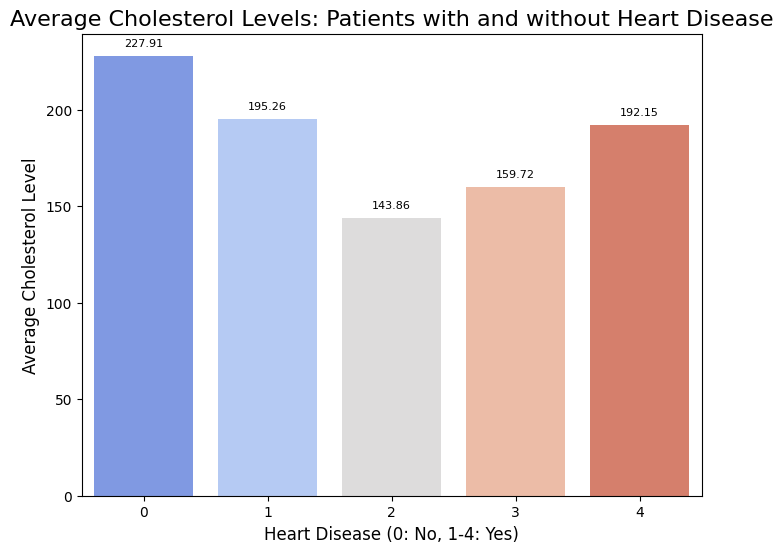

In [35]:
#Calculating Average Cholestrol Levels
cholesterol_comparison = datafile.groupby('num')['chol'].mean()

# Plotting the comparison between cholesterol levels for patients with and without heart disease
plt.figure(figsize=(8, 6))
sns.barplot(x=cholesterol_comparison.index, y=cholesterol_comparison.values, palette='coolwarm')

# Adding title and labels
plt.title('Average Cholesterol Levels: Patients with and without Heart Disease', fontsize=16)
plt.xlabel('Heart Disease (0: No, 1-4: Yes)', fontsize=12)
plt.ylabel('Average Cholesterol Level', fontsize=12)

# Displaying the average values on top of the bars
for index, value in enumerate(cholesterol_comparison.values):
    plt.text(index, value + 5, f'{value:.2f}', ha='center', fontsize=8)

plt.show()


<ipython-input-49-a59b39c6e056>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=datafile['num'], y=datafile['chol'], palette='coolwarm')


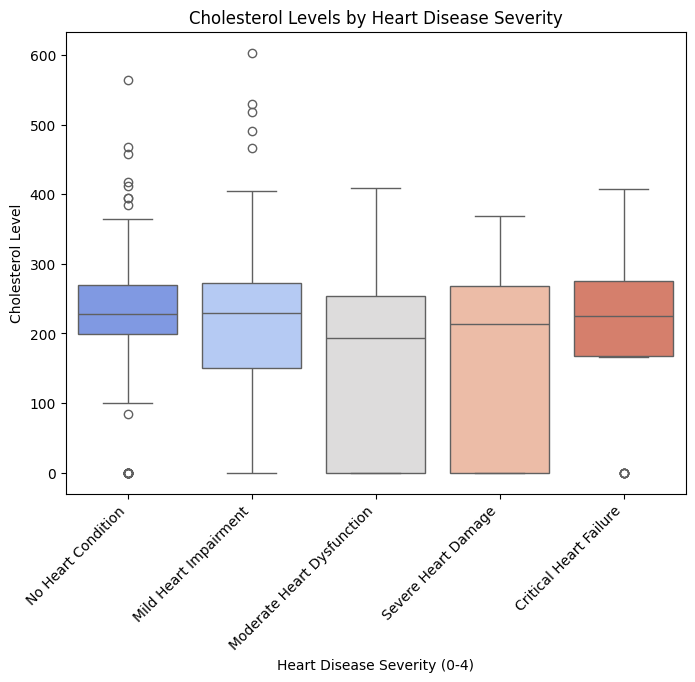

In [49]:
# Plotting for Cholesterol
plt.figure(figsize=(8, 6))
sns.boxplot(x=datafile['num'], y=datafile['chol'], palette='coolwarm')

# Adding title and labels
plt.title('Cholesterol Levels by Heart Disease Severity')
plt.xlabel('Heart Disease Severity (0-4)')
plt.ylabel('Cholesterol Level')

# Custom x-axis labels with updated labels
severity_labels = ['No Heart Condition', 'Mild Heart Impairment', 'Moderate Heart Dysfunction', 'Severe Heart Damage', 'Critical Heart Failure']
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=severity_labels, rotation=45, ha='right')

# Display the plot
plt.show()


<ipython-input-45-3fd062dce06d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=datafile['num'], y=datafile['trestbps'], palette='coolwarm')


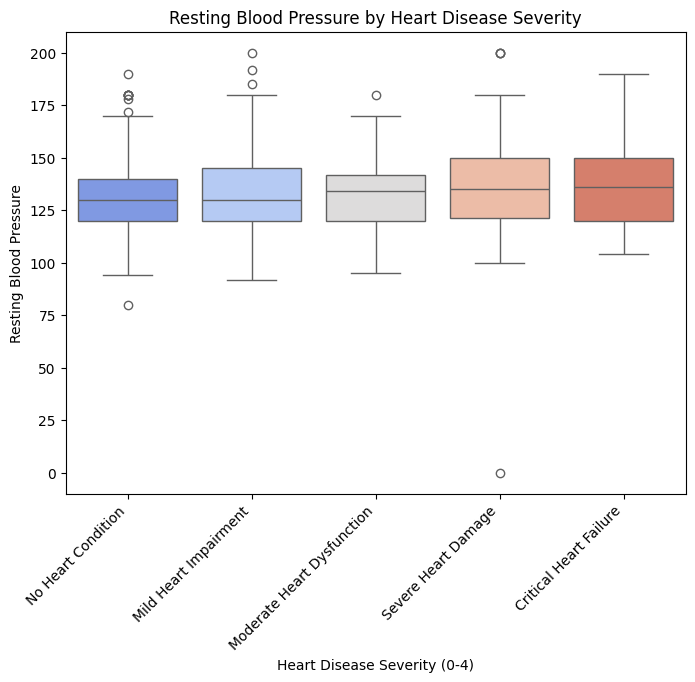

In [45]:
# Plotting for Resting Blood Pressure
plt.figure(figsize=(8, 6))
sns.boxplot(x=datafile['num'], y=datafile['trestbps'], palette='coolwarm')

# Adding title and labels
plt.title('Resting Blood Pressure by Heart Disease Severity')
plt.xlabel('Heart Disease Severity (0-4)')
plt.ylabel('Resting Blood Pressure')

# Custom x-axis labels with updated labels
severity_labels = ['No Heart Condition', 'Mild Heart Impairment', 'Moderate Heart Dysfunction', 'Severe Heart Damage', 'Critical Heart Failure']
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=severity_labels, rotation=45, ha='right')

# Display the plot
plt.show()


<ipython-input-48-9eb81a5aa319>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=datafile['chol'], palette='Set2')  # Using Set2 palette for colors
<ipython-input-48-9eb81a5aa319>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=datafile['trestbps'], palette='Set2')  # Using Set2 palette for colors


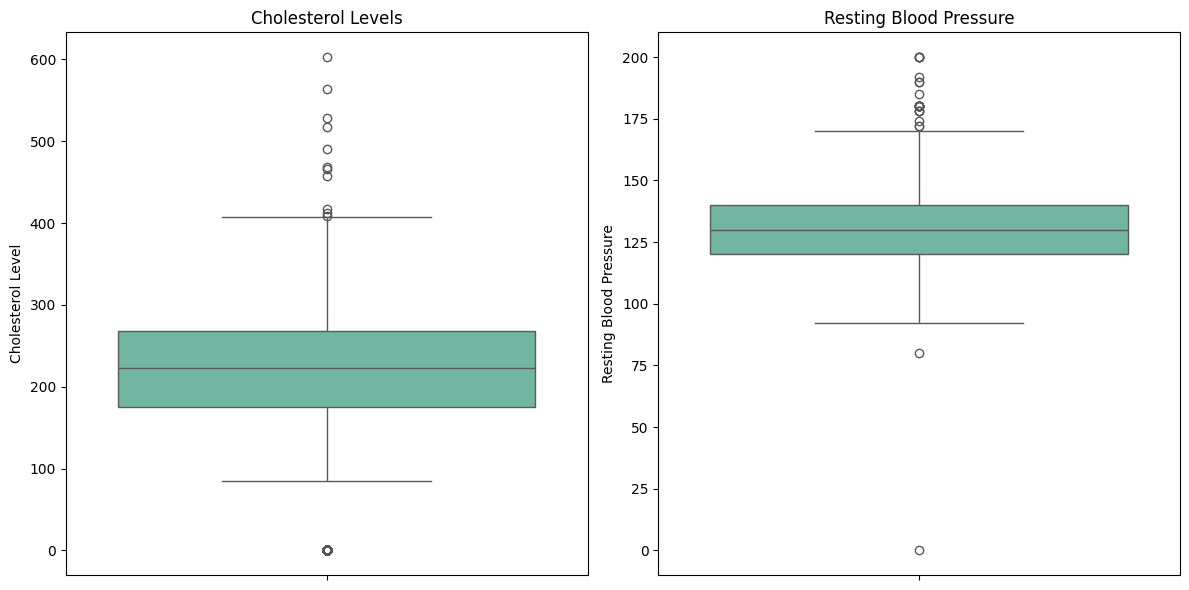

In [48]:
# Plotting for Cholesterol
plt.figure(figsize=(12, 6))

# Box plot for Cholesterol
plt.subplot(1, 2, 1)
sns.boxplot(y=datafile['chol'], palette='Set2')
plt.title('Cholesterol Levels')
plt.ylabel('Cholesterol Level')

# Box plot for Resting Blood Pressure
plt.subplot(1, 2, 2)
sns.boxplot(y=datafile['trestbps'], palette='Set2')
plt.title('Resting Blood Pressure')
plt.ylabel('Resting Blood Pressure')

# Display the plots
plt.tight_layout()
plt.show()
